In [2]:
import pandas as pd
from fact.io import read_h5py

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
SIM_VERSION = '20201023_v0.6.3_prod5_local_wo_n_islands'

In [4]:
df_gamma_diff = pd.read_hdf(
    f'simulations/dl1_gamma-diffuse_20deg_180deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)
df_gamma = pd.read_hdf(
    f'simulations/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)
df_proton = pd.read_hdf(
    f'simulations/dl1_proton_20deg_180deg_{SIM_VERSION}_testing.h5',
    key='dl1/event/telescope/parameters/LST_LSTCam'
)

In [5]:
max_intensity = 1500
df_gamma_diff_selected = df_gamma_diff.query(f'intensity < {max_intensity}')
df_gamma_selected = df_gamma.query(f'intensity < {max_intensity}')
df_proton_selected = df_proton.query(f'intensity < {max_intensity}')

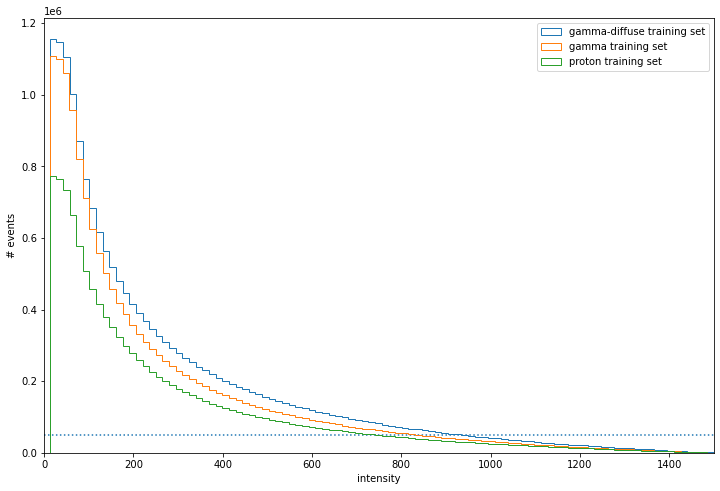

In [6]:
plt.hist(df_gamma_diff_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma-diffuse training set')
plt.hist(df_gamma_selected.intensity, bins=100, histtype='step', cumulative=-1, label='gamma training set')
plt.hist(df_proton_selected.intensity, bins=100, histtype='step', cumulative=-1, label='proton training set')

plt.xlabel('intensity')
plt.ylabel('# events')
plt.xlim(0, max_intensity)
plt.legend()

In [17]:
import tables

with tables.open_file(f'simulations/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_testing.h5') as f:
    sim_runs = f.root.simulation.run_config[:]
print(*sim_runs.dtype.names)

obs_id run_array_direction corsika_version simtel_version energy_range_min energy_range_max prod_site_B_total prod_site_B_declination prod_site_B_inclination prod_site_alt spectral_index shower_prog_start shower_prog_id detector_prog_start detector_prog_id num_showers shower_reuse max_alt min_alt max_az min_az diffuse max_viewcone_radius min_viewcone_radius max_scatter_range min_scatter_range core_pos_mode injection_height atmosphere corsika_iact_options corsika_low_E_model corsika_high_E_model corsika_bunchsize corsika_wlen_min corsika_wlen_max corsika_low_E_detail corsika_high_E_detail


In [ ]:
from pyirf.simulations import SimulatedEventsInfo

SimulatedEventsInfo?
#n_showers = sum(num_showers) oder num_showers*shower_reuse
#max_impact = max_scatter_range
#viewcone = max_viewcone_radius | min_viewcone_radius 


In [35]:
import h5py

with h5py.File(f'build/dl1_gamma_20deg_180deg_off0.4deg_{SIM_VERSION}_training_precuts.h5', mode='r') as f:
    print('corsika_runs' in f)

True


In [36]:
run_test = read_h5py('build/dl2_v0.6.1_v05_LST-1.Run02769.h5', key='events')

print(run_test.columns)

Index(['alt_tel', 'az_tel', 'calibration_id', 'concentration_cog',
       'concentration_core', 'concentration_pixel', 'disp_prediction',
       'dragon_time', 'event_id', 'focal_length', 'gamma_energy_prediction',
       'gammaness', 'intensity', 'intercept', 'kurtosis',
       'leakage_intensity_width_1', 'leakage_intensity_width_2',
       'leakage_pixels_width_1', 'leakage_pixels_width_2', 'length',
       'log_intensity', 'mc_core_distance', 'mc_type', 'n_islands', 'n_pixels',
       'obs_id', 'phi', 'psi', 'r', 'skewness', 'source_alt_prediction',
       'source_az_prediction', 'source_dec_prediction', 'source_ra_prediction',
       'source_x_prediction', 'source_y_prediction', 'tel_id', 'tel_pos_x',
       'tel_pos_y', 'tel_pos_z', 'tib_time', 'time_gradient', 'trigger_time',
       'trigger_type', 'ucts_time', 'ucts_trigger_type', 'width', 'wl', 'x',
       'y'],
      dtype='object')
